# Mining Relationships Among Records: Clustering
An unsupervised machine learning model

Cluster analysis divides data into groups (clusters) that are meaningful, useful, or both, using on information found only in the data that describes the objects and their relationships. 

> If meaningful groups are the goal, then the clusters should capture the natural structure of the data (customer segmentation). 

> If the goal is utility, then cluster analysis can be defined as the study of technicques for finding the most representative cluster prototypes - to create an abstraction or a summarization (data compression/vector quantization, generating cluster prototypes for further analysis). 

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
import matplotlib.pylab as plt
from pandas.plotting import parallel_coordinates

## Example: Utilities Dataset


Utilities.csv gives corporate data on 22 U.S. public utility companies. We are interested in forming groups of similar utilities. The records to be clustered are the utilities, and the clustering will be based on the eight measurements on each utility. An example where clustering would be useful is a study to predict the cost impact of deregulation. To do the requisite analysis, economists would need to build a detailed cost model of the various utilities. It would save a considerable amount of time and effort if we could cluster similar types of utilities and build detailed cost models for just one “typical” utility in each cluster and then scale up from these models to estimate results for all utilities.
For each company that will be impacted, economists would create a separate model. However, as a data scientist we like to find other ways -- how about identifying similar companies, so that economists can focus on the vital few "groups" of companies!

**Data dictionary:**
- Fixed: fixed-charge covering ratio (income/debt)
- RoR: rate of return on capital
- Cost: cost per kilowatt capacity in place
- Load: annual load factor
- Demand: pealk kiliwatthour demand groth from 1974 to 1975
- Sales: sales (kilowatthour use per year)
- Nuclear: percent nuclear
- Fuel Cost: total fuel costs (cents per kilowatthour)

In [2]:
utilities_df = pd.read_csv("Utilities.csv")
# set riw names to the utilities column
utilities_df.set_index('Company',inplace=True)
# convert to integer to float to avoid sclae function warning
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df.head()

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
Consolidated NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044


### Focus on Sales and Fuel Cost Features

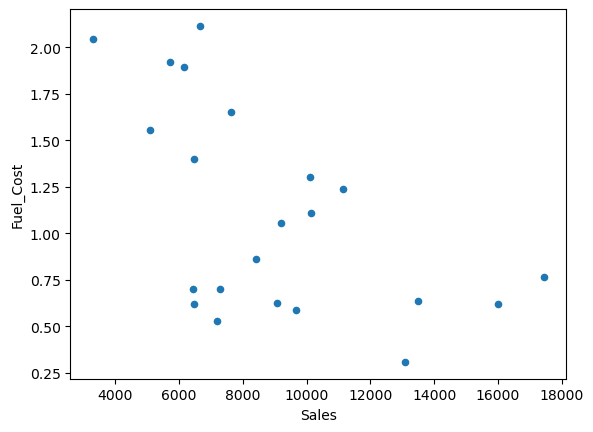

In [4]:
utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', marker='o');

In [5]:
utilities_df_figure = utilities_df.reset_index()
utilities_df_figure.head()

,Company,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
1,Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
2,Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
3,Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
4,Consolidated NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044


### Annotate the scatter plot!

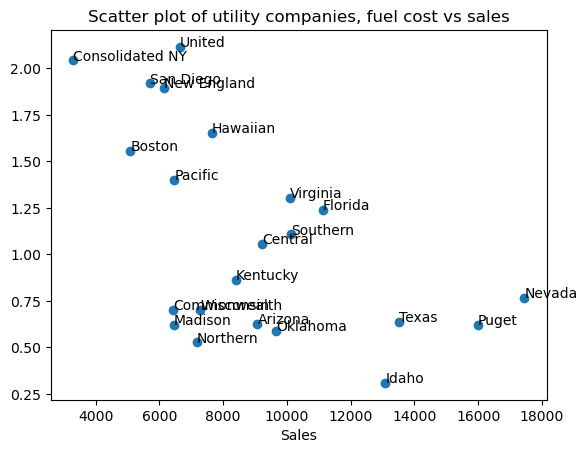

In [6]:
title = 'Scatter plot of utility companies, fuel cost vs sales'
ax = utilities_df_figure.set_index('Sales')['Fuel_Cost'].plot(style='o',title=title)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(utilities_df_figure.Sales, utilities_df_figure.Fuel_Cost, utilities_df_figure.Company, ax)

# Similarity Metric: Measuring Distance Between Two Observations
## Numeric Data: Euclidean distance 
- scale dependent(normalize, unless you want to weight tge measurements)
- ignores the relationship between variables (if variables are correlated, use a different distance, ie. statistical distance)
- sensitive to outliers (if you have to keep the outliers, use a more robust distance, e.g. Manhattan distance)


In [7]:
#compute Euclidean distance
d = pairwise.pairwise_distances(utilities_df,metric='euclidean')
utilities_euclidean = pd.DataFrame(d,columns = utilities_df.index, index=utilities_df.index)
utilities_euclidean.head()

Company,Arizona,Boston,Central,Commonwealth,Consolidated NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,United,Virginia,Wisconsin
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,2427.588875,1016.617691,1790.485648
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,1562.210811,5005.081262,2199.721665
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,2563.637362,883.535455,1925.772564
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,232.476871,3670.018191,864.273153
Consolidated NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3350.073118,6793.035300,3987.335962


**Normalization** is important for Euclidean distance calculations, because the distance is highly influenced by scale, it is customary to normalize continous variables before computing Euclidean distance. 

#### Normalize the utilities data
You can normalize using a sample standard deviation (using pandas) or a population standard deviation (using sklearn), depending on whether the data is a good representation of the population. (The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.https://scikit-learn.org/stable/modules/preprocessing.html) 

For more on comparing the effect of different scalers on data with outliers: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [10]:
utilities_df.head()

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
Consolidated NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044


In [11]:
#sklearn uses population standard deviation
utilities_df_norm_p = utilities_df.apply(preprocessing.scale,axis=0)
utilities_df_norm_p.head()

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
Consolidated NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [12]:
#pandas uses sample standard deviation
utilities_df_norm_s= (utilities_df - utilities_df.mean())/utilities_df.std()
utilities_df_norm_s.head()

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.293158,-0.684639,-0.417122,-0.577715,-0.526228,0.045903,-0.714629,-0.853675
Boston,-1.214511,-0.194454,0.821002,0.206836,-0.333812,-1.077764,0.792048,0.813297
Central,1.712141,2.078224,-1.339646,-0.891536,0.051019,0.083931,-0.714629,-0.080431
Commonwealth,-0.509947,0.206607,-0.004414,-0.219063,-0.943128,-0.701706,1.328020,-0.724202
Consolidated NY,2.037324,-0.862888,0.578233,-1.295019,-0.718643,-1.581428,0.214389,1.692638


In [13]:
(utilities_df_norm_p-utilities_df_norm_s).head()

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.006899,-0.016111,-0.009816,-0.013595,-0.012384,0.001080,-0.016817,-0.020089
Boston,-0.028581,-0.004576,0.019320,0.004867,-0.007855,-0.025363,0.018639,0.019139
Central,0.040291,0.048906,-0.031525,-0.020980,0.001201,0.001975,-0.016817,-0.001893
Commonwealth,-0.012000,0.004862,-0.000104,-0.005155,-0.022194,-0.016513,0.031252,-0.017042
Consolidated NY,0.047944,-0.020306,0.013607,-0.030475,-0.016912,-0.037215,0.005045,0.039832


## Calculate the Distance Between the Closest Locations: Arizona and Commonwealth

In [14]:
def calculate_distance_btw_two_nodes(A,B):
    result = ((((B[1] - A[1] )**2) +  
          ((B[0] - A[0])**2) )**0.5)
    print (round(result,2))

In [15]:
calculate_distance_btw_two_nodes(utilities_df_norm_s.loc['Arizona',['Sales','Fuel_Cost']],
                                 utilities_df_norm_s.loc['Commonwealth',['Sales','Fuel_Cost']])

0.76


## Where is the Centroid?

In [18]:
utilities_df_norm_s[["Sales","Fuel_Cost"]].head()

,Sales,Fuel_Cost
Company,,
Arizona,0.045903,-0.853675
Boston,-1.077764,0.813297
Central,0.083931,-0.080431
Commonwealth,-0.701706,-0.724202
Consolidated NY,-1.581428,1.692638


#### Define clusters:

In [19]:
df_clusterA = utilities_df_norm_s.loc[slice("Arizona","Boston"), ["Sales","Fuel_Cost"]]
df_clusterA

,Sales,Fuel_Cost
Company,,
Arizona,0.045903,-0.853675
Boston,-1.077764,0.813297


In [20]:
df_clusterB = utilities_df_norm_s.loc[["Central","Consolidated NY","Commonwealth"], ["Sales","Fuel_Cost"]]
df_clusterB

,Sales,Fuel_Cost
Company,,
Central,0.083931,-0.080431
Consolidated NY,-1.581428,1.692638
Commonwealth,-0.701706,-0.724202


## Calculate the Distance Between Two Centroids
#### UDF Calculation


In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeansA = KMeans(n_clusters=1, n_init=20, random_state = 0).fit(df_clusterA)
kmeansB = KMeans(n_clusters=1, n_init=20, random_state = 0).fit(df_clusterB)

In [23]:
calculate_distance_btw_two_nodes(kmeansA.cluster_centers_[0],
                                 kmeansB.cluster_centers_[0])

0.38


#### Calculate Euclidean Distance Using Numpy

In [25]:
import numpy as np
dist = np.linalg.norm(kmeansA.cluster_centers_ - kmeansB.cluster_centers_)
dist

0.3835693236409804

#### Calculate the Euclidean Distance Using pairwise.pairwise_distances

In [27]:
df = pd.DataFrame(kmeansA.cluster_centers_, columns = ['x','y'],index=['A'])
df.loc['B']=kmeansB.cluster_centers_[0]

In [28]:
#compute Euclidean distance
d = pairwise.pairwise_distances(df,metric='euclidean')
euclidean = pd.DataFrame(d,columns = df.index, index=df.index)
euclidean.head()

,A,B
A,0.000000,0.383569
B,0.383569,0.000000


#### Calculate the Euclidean Distance Using pairwise.paired_distances()
metric can be “euclidean”, “manhattan”, or “cosine”.

In [29]:
#compute Euclidean distance
d = pairwise.paired_distances(kmeansA.cluster_centers_ ,
                              kmeansB.cluster_centers_ ,
                              metric='euclidean')
round(d[0],2)

0.38

> The eucledian distance between cluster A and cluster B is 0.38.

---

### Apply K-Means Algorithm 

use the normalized df from above, utilities_df_norm_p

In [30]:
kmeans = KMeans(n_clusters=6, n_init=20, random_state=0).fit(utilities_df_norm_p)
memb = pd.Series(kmeans.labels_, index=utilities_df_norm_p.index)
for key, item in memb.groupby(memb): print (key, ':', ' ,'.join(item.index))

0 : Boston ,Hawaiian ,Kentucky ,New England ,Pacific ,United
1 : Commonwealth ,Madison ,Northern ,Virginia ,Wisconsin
2 : Arizona ,Central ,Florida ,Oklahoma ,Southern ,Texas
3 : Idaho ,Nevada ,Puget
4 : San Diego
5 : Consolidated NY


In [31]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=utilities_df_norm_p.columns)
pd.options.display.float_format = '{:,.3f}'.format
centroids

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
0,-0.097,-0.138,0.339,1.118,-0.041,-0.628,-0.465,0.879
1,-0.012,0.339,0.224,-0.366,0.170,-0.411,1.602,-0.609
2,0.393,0.759,-1.177,-0.534,-0.801,0.445,-0.503,-0.416
3,-0.614,-0.853,1.370,-0.492,1.015,1.900,-0.731,-0.988
4,-1.964,-1.978,-0.800,1.129,1.890,-0.923,-0.226,1.504
5,2.085,-0.883,0.592,-1.325,-0.736,-1.619,0.219,1.732


In [32]:
centroids.style.applymap(lambda x: "background-color: red" if x>0 else "background-color: white")

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
0,-0.096657,-0.138215,0.339216,1.117962,-0.040781,-0.628359,-0.465281,0.879063
1,-0.011599,0.339180,0.224086,-0.366466,0.170386,-0.411331,1.601868,-0.609460
2,0.393352,0.758801,-1.176527,-0.533952,-0.801203,0.444577,-0.502869,-0.416385
3,-0.614402,-0.852787,1.370418,-0.491890,1.015056,1.900210,-0.731447,-0.988493
4,-1.964237,-1.977857,-0.799662,1.129434,1.890361,-0.922638,-0.225529,1.504241
5,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [149]:
def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [150]:
centroids.style.applymap(_color_red_or_green)

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
0,-0.096657,-0.138215,0.339216,1.117962,-0.040781,-0.628359,-0.465281,0.879063
1,-0.011599,0.339180,0.224086,-0.366466,0.170386,-0.411331,1.601868,-0.609460
2,0.393352,0.758801,-1.176527,-0.533952,-0.801203,0.444577,-0.502869,-0.416385
3,-0.614402,-0.852787,1.370418,-0.491890,1.015056,1.900210,-0.731447,-0.988493
4,-1.964237,-1.977857,-0.799662,1.129434,1.890361,-0.922638,-0.225529,1.504241
5,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [167]:
def special_settings(styler):
    styler.set_caption("Cluster Centroids")
    styler.format(precision=2) 
    styler.background_gradient(axis=None, vmin=-2, vmax=2.1, cmap="YlGnBu")
    return styler

In [168]:
centroids.style.pipe(special_settings)

,Fixed_charge,RoR,Cost,Load,D Demand,Sales,Nuclear,Fuel_Cost
0,-0.10,-0.14,0.34,1.12,-0.04,-0.63,-0.47,0.88
1,-0.01,0.34,0.22,-0.37,0.17,-0.41,1.60,-0.61
2,0.39,0.76,-1.18,-0.53,-0.80,0.44,-0.50,-0.42
3,-0.61,-0.85,1.37,-0.49,1.02,1.90,-0.73,-0.99
4,-1.96,-1.98,-0.80,1.13,1.89,-0.92,-0.23,1.50
5,2.09,-0.88,0.59,-1.33,-0.74,-1.62,0.22,1.73


In [170]:
#### ** complete!! **